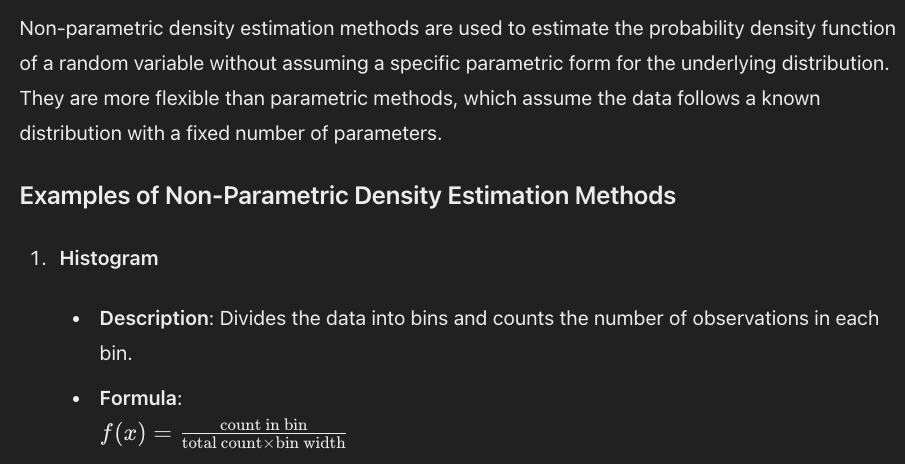

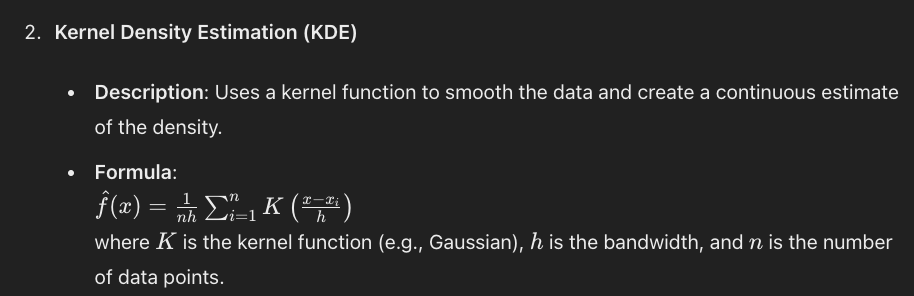

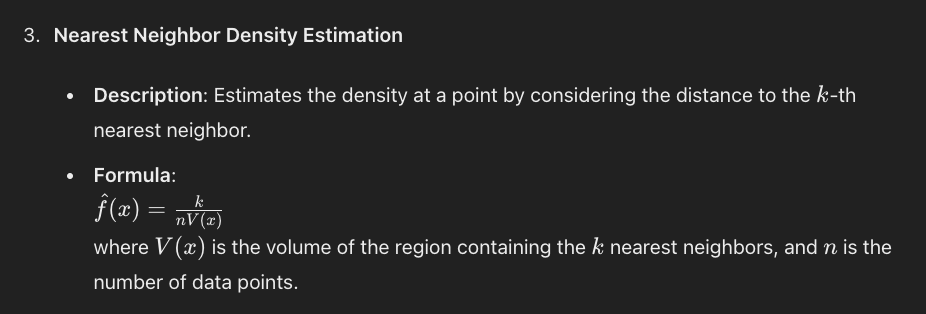

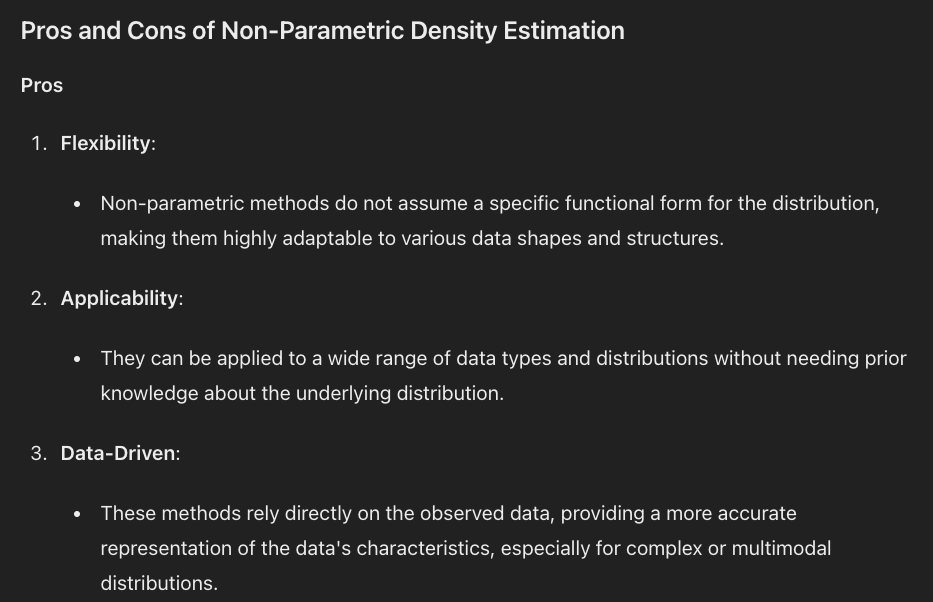

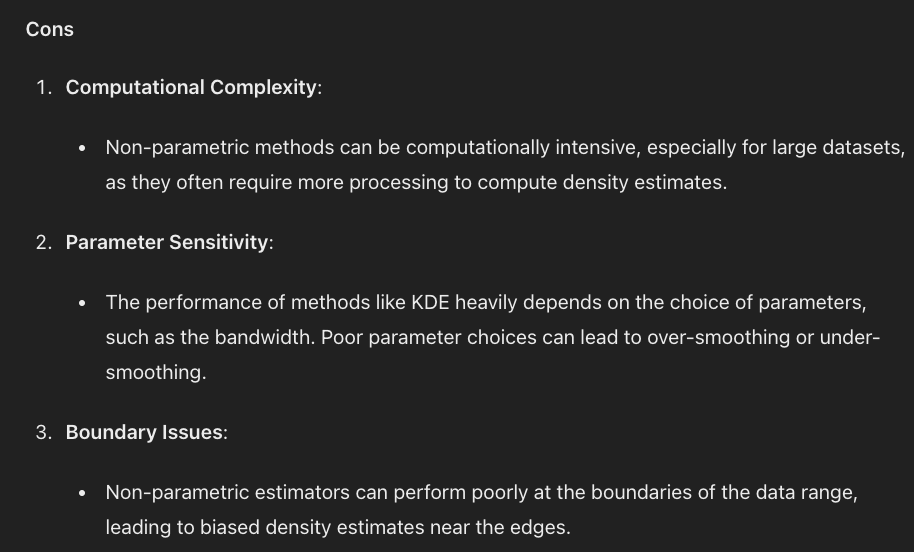

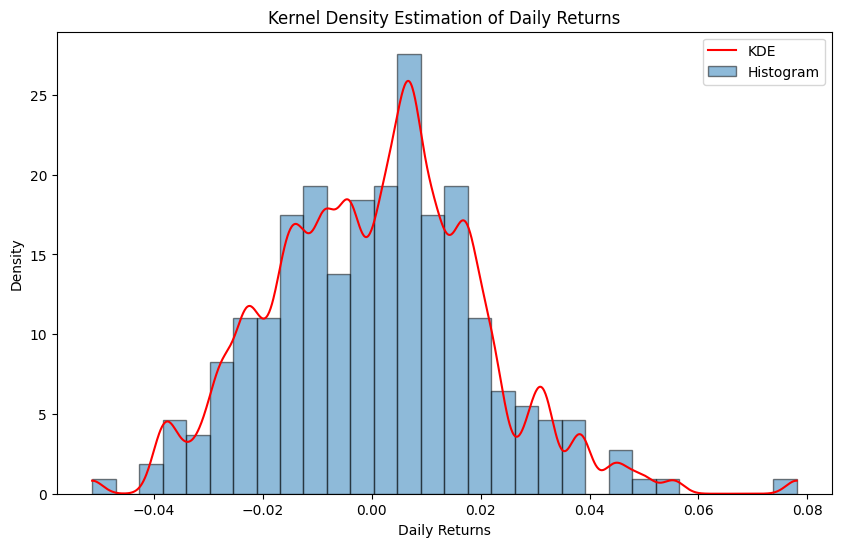

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Step 1: Collect Historical Data
# For this example, we'll use synthetic data to simulate daily returns
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', periods=252)  # Simulate one year of trading days
# Generate synthetic daily returns with a mean of 0.001 and a standard deviation of 0.02
daily_returns = np.random.normal(0.001, 0.02, len(dates))

# Create a pandas Series for convenience
returns_series = pd.Series(daily_returns, index=dates)

# Step 3: Estimate Density Using KDE
kde = gaussian_kde(returns_series, bw_method=0.1)  # Bandwidth parameter controls the smoothness

# Step 4: Visualize the Density
x = np.linspace(returns_series.min(), returns_series.max(), 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, kde(x), label='KDE', color='red')
plt.hist(returns_series, bins=30, density=True, alpha=0.5, edgecolor='black', label='Histogram')
plt.title('Kernel Density Estimation of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.legend()
plt.show()


# Kernel Density Estimation (KDE) for Volatility Estimation

/var/folders/d0/zpksyyln31xcrk5dycg4_4n40000gp/T/ipykernel_44596/1997671827.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(start='2023-01-01', periods=total_minutes, freq='T')


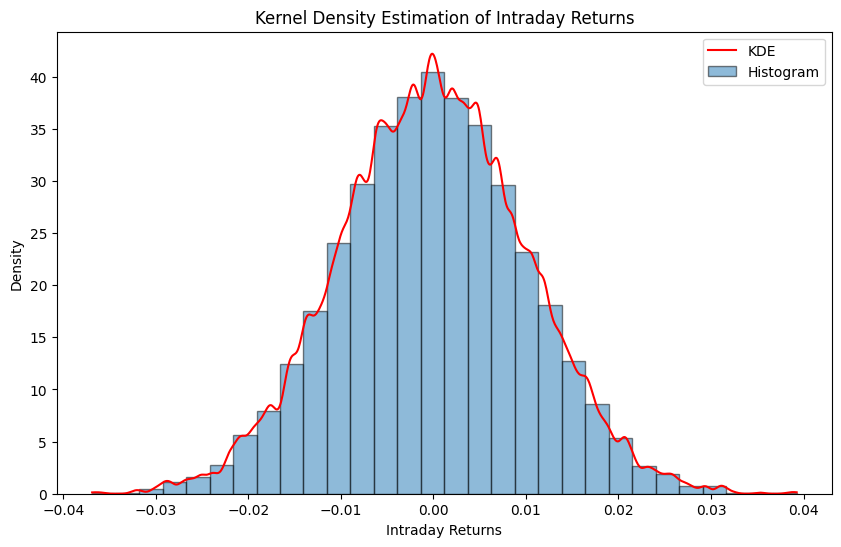

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Step 1: Collect Historical Intraday Data
# For this example, we'll use synthetic data to simulate intraday prices
np.random.seed(42)
minutes_per_day = 390  # Trading minutes in a day for NYSE
days = 20  # Number of trading days
total_minutes = minutes_per_day * days

# Generate synthetic intraday prices with a slight upward trend
price_changes = np.random.normal(0, 0.01, total_minutes)
prices = np.cumprod(1 + price_changes) * 100  # Starting price is 100

# Create a pandas DataFrame with a datetime index
dates = pd.date_range(start='2023-01-01', periods=total_minutes, freq='T')
price_series = pd.Series(prices, index=dates)

# Step 2: Calculate Intraday Returns
intraday_returns = price_series.pct_change().dropna()

# # Step 3: Estimate Density Using KDE
kde = gaussian_kde(intraday_returns, bw_method=0.05)  # Bandwidth parameter controls the smoothness

# # Step 4: Visualize the Density
x = np.linspace(intraday_returns.min(), intraday_returns.max(), 1000)
plt.figure(figsize=(10, 6))
plt.plot(x, kde(x), label='KDE', color='red')
plt.hist(intraday_returns, bins=30, density=True, alpha=0.5, edgecolor='black', label='Histogram')
plt.title('Kernel Density Estimation of Intraday Returns')
plt.xlabel('Intraday Returns')
plt.ylabel('Density')
plt.legend()
plt.show()
